## Dataset

The dataset chosen for this mini project is **Instacart Dataset**. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, there are orders between 4 and 100, with the sequence of products purchased in each order. The dataset also includes the products in each order, the time of day and day of week of each order, the name and aisle/department of each product, which are stored across various files.

#### Import required packages

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import os
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## **Stage 1**: Data Wrangling

In [ ]:
#@title Download the data
#!wget -qq https://
!unzip -qq Instacart.zip

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Load the data

Load all the given datasets

In [ ]:
root = '/content/Instacart/'
orders = pd.read_csv(root + 'orders.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datasets = {}

for i in os.listdir('/content/Instacart/'):
  print(i)
  datasets[i] = pd.read_csv("Instacart/"+i)

datasets = dict(sorted(datasets.items()))
datasets.keys()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


aisles.csv
products.csv
order_products__train.csv
departments.csv
orders.csv


dict_keys(['aisles.csv', 'departments.csv', 'order_products__train.csv', 'orders.csv', 'products.csv'])

In [ ]:
names  = list(datasets.keys())
names

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['aisles.csv',
 'departments.csv',
 'order_products__train.csv',
 'orders.csv',
 'products.csv']

In [ ]:
names[-1]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'products.csv'

### Data Integration

In [ ]:
df1 = datasets[names[2]]
df1.columns, df1.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object'),
 (1384617, 4))

In [ ]:
df2 = df1.merge(datasets[names[-1]], on='product_id')
df2.columns, df2.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
        'product_name', 'aisle_id', 'department_id'],
       dtype='object'),
 (1384617, 7))

In [ ]:
df3 = df2.merge(datasets[names[0]], on='aisle_id')
df3.columns, df3.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
        'product_name', 'aisle_id', 'department_id', 'aisle'],
       dtype='object'),
 (1384617, 8))

In [ ]:
df4 = df3.merge(datasets[names[3]], on='order_id')
df4.columns, df4.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
        'product_name', 'aisle_id', 'department_id', 'aisle', 'user_id',
        'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
        'days_since_prior_order'],
       dtype='object'),
 (1384617, 14))

In [ ]:
df5 = df4.merge(datasets[names[1]], on='department_id')
df5.columns, df5.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
        'product_name', 'aisle_id', 'department_id', 'aisle', 'user_id',
        'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
        'days_since_prior_order', 'department'],
       dtype='object'),
 (1384617, 15))

In [ ]:
df5.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,112108,train,4,4,10,9.0,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,112108,train,4,4,10,9.0,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,112108,train,4,4,10,9.0,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,112108,train,4,4,10,9.0,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,112108,train,4,4,10,9.0,canned goods


In [ ]:
final_df = df5

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Understanding relationships and new insights from the data

### Group orders by products and get how many times each product was ordered

In [ ]:
g = final_df.product_id.value_counts()
g = pd.DataFrame(g)
g.reset_index(inplace=True)
g.columns = ["product_id","count"]
g_products = g.merge(datasets['products.csv'],on="product_id")
g_products.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 5000x4000 with 0 Axes>

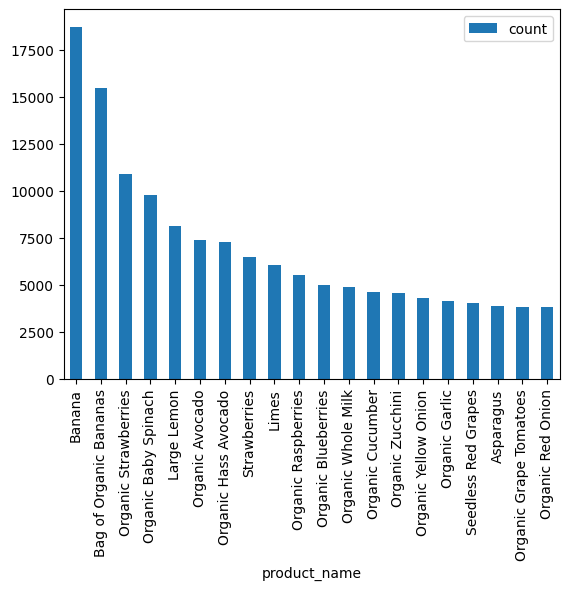

In [ ]:
plt.figure(figsize=(50, 40))
g_products.head(20).plot(kind="bar",x="product_name",y="count")
plt.show()

(Banana is the top ordered product)

### Find the number of orders per department


In [ ]:
g = final_df.department_id.value_counts()
g = pd.DataFrame(g)
g.reset_index(inplace=True)
g.columns = ["department_id","count"]
g_dept = g.merge(datasets['departments.csv'],on="department_id")
g_dept.head(5)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,department_id,count,department
0,4,409087,produce
1,16,217051,dairy eggs
2,19,118862,snacks
3,7,114046,beverages
4,1,100426,frozen


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


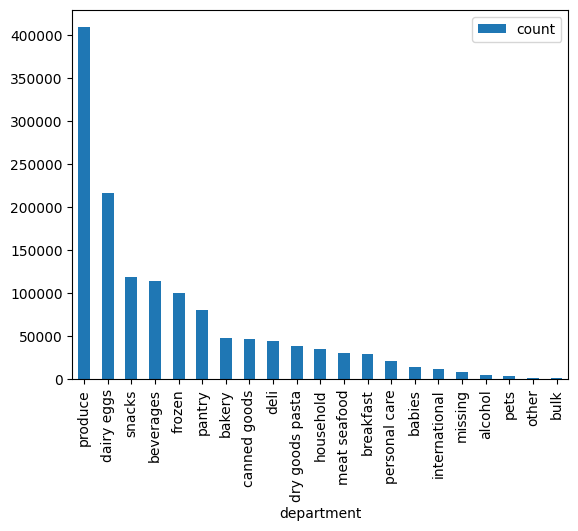

In [ ]:
g_dept.plot(kind="bar",x="department",y="count")
plt.show()

### Find the frequency of orders on week days

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


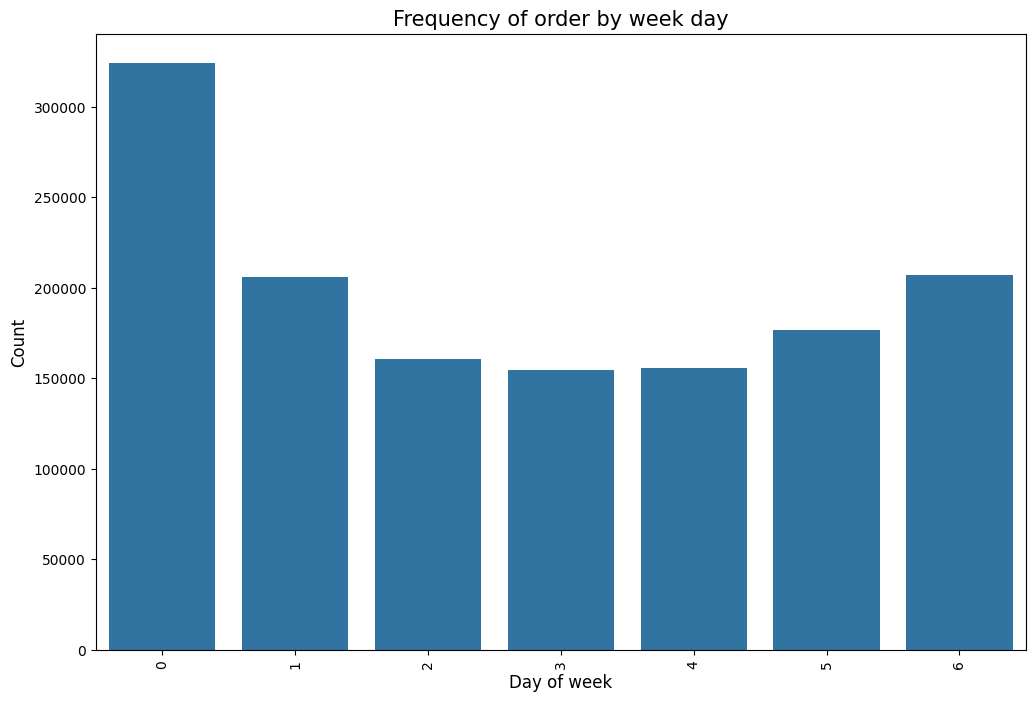

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=final_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

### Find the frequency of orders for hours of the day

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


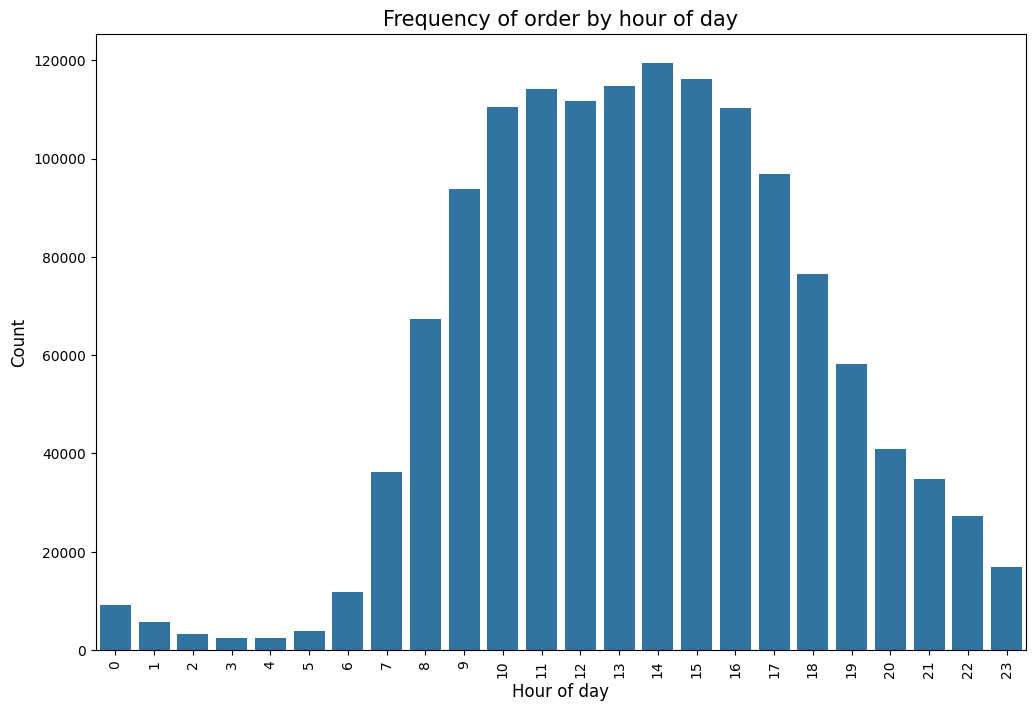

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=final_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

### Find the ratio of Re-ordered and Not Re-ordered products and visualize

In [ ]:
final_df[final_df['reordered']==1]['product_id'].max() #nunique()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


49688

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-e646301ab757>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[final_df['reordered']==1]['product_id'],  kde=False, label='Reordered')
<ipython-input-22-e646301ab757>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Plea

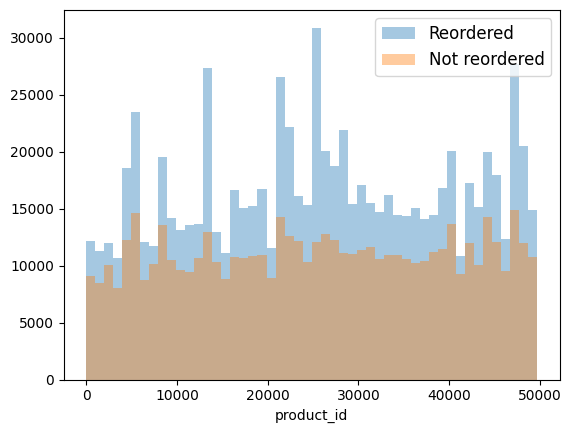

In [ ]:
sns.distplot(final_df[final_df['reordered']==1]['product_id'],  kde=False, label='Reordered')
sns.distplot(final_df[final_df['reordered']==0]['product_id'],  kde=False, label='Not reordered')

plt.legend(prop={'size': 12})
plt.show()

### Plot the heatmap of Re-order ratio of Day of week vs Hour of day ?

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


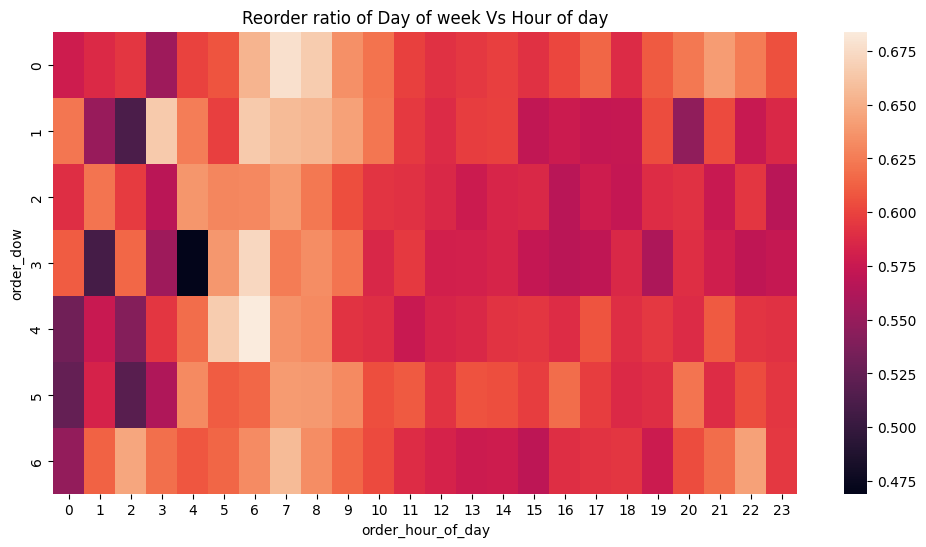

In [ ]:
grouped_df = final_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
#grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

## **Stage 2:** Create a basket

In [ ]:
product_counts = final_df.groupby('product_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
product_counts = product_counts.sort_values('frequency', ascending=False)[0:100].reset_index(drop = True)
product_counts.head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,frequency
0,24852,18726
1,13176,15480
2,21137,10894
3,21903,9784
4,47626,8135
5,47766,7409
6,47209,7293
7,16797,6494
8,26209,6033
9,27966,5546


In [ ]:
freq_products = list(product_counts.product_id)
freq_products[1:10]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[13176, 21137, 21903, 47626, 47766, 47209, 16797, 26209, 27966]

In [ ]:
order_products = final_df[final_df.product_id.isin(freq_products)]
order_products.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(314227, 15)

In [ ]:
basket = order_products.groupby(['order_id', 'product_name'])['reordered'].count().unstack().reset_index().fillna(0).set_index('order_id')
basket.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,...,Sparkling Lemon Water,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
basket = order_products.pivot_table(columns='product_name', values='reordered',index='order_id' ).reset_index().fillna(0).set_index('order_id')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket = basket.applymap(encode_units)
basket.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-022227f56c91>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode_units)


product_name,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,...,Sparkling Lemon Water,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## **Stage 3:** Apply Apriori algorithm

In [ ]:
shortbasket = basket[:100000]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_items = apriori(shortbasket, min_support=0.01, use_colnames=True)
frequent_items.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.018668,(100% Whole Wheat Bread)
1,0.013298,(2% Reduced Fat Milk)
2,0.017304,(Apple Honeycrisp Organic)
3,0.026180,(Asparagus)
4,0.142376,(Bag of Organic Bananas)


In [ ]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
19,(Limes),(Large Lemon),0.045115,0.063111,0.010325,0.228862,3.626315,1.0,0.007478,1.214942,0.758455,0.105464,0.176916,0.196231
18,(Large Lemon),(Limes),0.063111,0.045115,0.010325,0.163600,3.626315,1.0,0.007478,1.141661,0.773025,0.105464,0.124083,0.196231
30,(Organic Strawberries),(Organic Raspberries),0.091668,0.045594,0.013074,0.142625,3.128143,1.0,0.008895,1.113172,0.748979,0.105277,0.101666,0.214687
31,(Organic Raspberries),(Organic Strawberries),0.045594,0.091668,0.013074,0.286749,3.128143,1.0,0.008895,1.273511,0.712822,0.105277,0.214769,0.214687
20,(Organic Avocado),(Large Lemon),0.066340,0.063111,0.010293,0.155156,2.458445,1.0,0.006106,1.108948,0.635391,0.086381,0.098245,0.159124
21,(Large Lemon),(Organic Avocado),0.063111,0.066340,0.010293,0.163093,2.458445,1.0,0.006106,1.115608,0.633201,0.086381,0.103628,0.159124
3,(Bag of Organic Bananas),(Organic Hass Avocado),0.142376,0.064379,0.021449,0.150651,2.340054,1.0,0.012283,1.101574,0.667728,0.115750,0.092208,0.241909
2,(Organic Hass Avocado),(Bag of Organic Bananas),0.064379,0.142376,0.021449,0.333168,2.340054,1.0,0.012283,1.286117,0.612064,0.115750,0.222465,0.241909
4,(Organic Raspberries),(Bag of Organic Bananas),0.045594,0.142376,0.014811,0.324842,2.281578,1.0,0.008319,1.270257,0.588541,0.085533,0.212758,0.214434
5,(Bag of Organic Bananas),(Organic Raspberries),0.142376,0.045594,0.014811,0.104026,2.281578,1.0,0.008319,1.065217,0.654957,0.085533,0.061224,0.214434


## Instacart market basket analysis:

1. **Product Ordering Patterns**
- **Top Products**: Bananas are the most frequently ordered product
- **Main findings**: Analysis revealed the most popular products and their ordering frequencies

2. **Temporal Analysis**
- **Day of Week Patterns**:
  - Higher order frequencies during weekends
  - Lower order volumes mid-week
- **Hour of Day Patterns**:
  - Peak ordering hours: 10 AM - 4 PM
  - Lower ordering activity during early morning hours
  - Clear customer preference for daytime shopping

3. **Reordering Behavior**
- **Reorder Analysis**:
  - Created a heatmap showing reorder ratios by day and hour
  - Identified peak reorder times
  - Discovered patterns in customer reordering behavior

4. **Market Basket Analysis**
Through the Apriori algorithm:
- Analyzed frequent itemsets with minimum support of 0.01
- Generated association rules with lift > 1
- Key insights:
  - Identified products frequently bought together
  - Found strong associations between certain product pairs
  - Discovered purchasing patterns useful for:
    - Product recommendations
    - Store layout optimization
    - Marketing strategies

5. **Department-wise Analysis**
- Identified most popular departments
- Analyzed department-wise purchase patterns
- Found correlations between departments and time of purchase

6. **Business Value**
This analysis provides actionable insights for:
- Inventory management
- Store layout optimization
- Targeted marketing campaigns
- Product recommendation systems
- Peak hour staffing decisions
- Reorder prediction models

The project successfully demonstrates shopping patterns and product associations in the Instacart dataset, providing valuable insights for retail strategy and customer behavior understanding.
